# Satellite Image Classification Using ML Algorithm

# Introduction

Firstly, if you're new to this i would recommend you to clear your python basics and some important library related to this project named as 

1. Numpy 
2. Matplotlib
3. Rasterio
4. Sklearn

and some more like pandas , geopandas , plotly, gdal, tensoerflow, pytorch are few more to explore as a GIS-Developer
above four are used in classification of satellite image 


# Data Download From 

This is data From Sentinel 2-b downloaded from ESA official site you can also dowonlad data from google earth engine 
 
Copernicus Open Access Hub :- https://scihub.copernicus.eu/dhus/#/home
 
# General Infomation about data 

sentinel 2-b has contain 13 bands in (.jp2) format 

Resolution : 10m 
Bands      : 13
FCC        : B3, B4, B8 
refer this site for more band composition of sentinel : https://gisgeography.com/sentinel-2-bands-combinations/

Here i use ERDAS IMAGINE software to combine (layer stack) this three bands with file format (.tif)

In this project we dealing with the ML Alogorithm K-mean(Clustering)
for more INFO visit officals : https://scikit-learn.org/stable/modules/clustering.html#clustering

here is Reference book to know more : Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow

So, Here we go........

In [1]:
# Install All Essential Libraries using pip 

! pip install numpy 
! pip install matplotlib.pyplot 
! pip install rasterio 
! pip install sklearn 
! pip install os 

In [ ]:
# Import all Libraries

In [2]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# read image using rasterio
image = rio.open("F:\Project\layerstack\sample.tif")

In [4]:
print(image.meta) # meta data 

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2431, 'height': 3729, 'count': 3, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.0, 0.0, 282695.0,
       0.0, -10.0, 2094325.0)}


In [5]:
img_arr = image.read() # read the opened image

In [6]:
vmin, vmax = np.nanpercentile(img_arr, (5,95))  # 5-95% contrast stretch

In [7]:
img_arr # read as an array 

array([[[3172, 2922, 2785, ..., 2727, 3027, 2952],
        [2955, 2825, 2779, ..., 3000, 3129, 3010],
        [2868, 2818, 2753, ..., 3206, 3353, 3152],
        ...,
        [2809, 2750, 2700, ..., 3184, 3055, 3048],
        [3085, 2936, 2838, ..., 3003, 3149, 3182],
        [3110, 3025, 2911, ..., 2911, 3007, 3033]],

       [[2864, 2948, 3031, ..., 1951, 1972, 2030],
        [2969, 3044, 3062, ..., 1977, 1991, 2015],
        [3048, 3069, 3042, ..., 1988, 1972, 1989],
        ...,
        [2072, 2110, 2105, ..., 2026, 2094, 2200],
        [2171, 2191, 2216, ..., 1968, 2027, 2225],
        [2197, 2215, 2199, ..., 1984, 2040, 2160]],

       [[3219, 3187, 3168, ..., 1863, 1807, 1972],
        [3210, 3170, 3150, ..., 1825, 1880, 1972],
        [3177, 3148, 3108, ..., 1864, 1801, 1851],
        ...,
        [2048, 2119, 2167, ..., 2096, 2265, 2432],
        [2264, 2322, 2303, ..., 2021, 2086, 2396],
        [2305, 2342, 2345, ..., 1987, 2086, 2325]]], dtype=uint16)

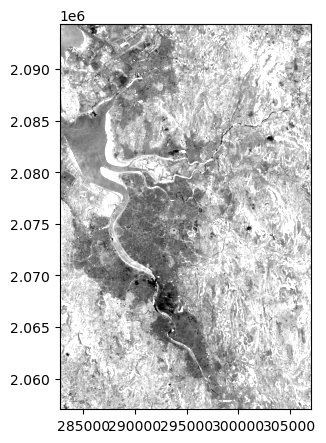

In [8]:
# plot using matplotlib
plt.figure(figsize=[5,5])
show(image, cmap='gray', vmin=vmin, vmax=vmax) # you can change color to any but better practice is to show contrace in "gray"
plt.show()

# color suppoted in matplot

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',
'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 
'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r',
'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [9]:
img_arr.min()  # minimum value in array 

1187

In [10]:
img_arr.max()  # maximum value in array 

15081

In [11]:
# create an empty array with same dimension and data type to fit data in it 
imgxyb = np.empty((image.height, image.width, image.count), image.meta['dtype'])

In [12]:
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = image.read(band+1)

In [13]:
print(imgxyb.shape)

(3729, 2431, 3)


# 3D To 1D array 

It is most important process because ML algorithm only works on 1D array 

In [14]:
# convert to 1d array
img1d=imgxyb[:,:,:3].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

# Dimensionality Reduction
Dimensionality Reduction is important because it reduce the data and runtime also sometimes we require less accuracy with less runtime

you may also run your algorithm without Dimensionality Reduction but it takes more time while you dealing with large dataset It provide you fast result Depands on you wheather you want more accuracy or less runtime

In [15]:
img1d = img1d/15081

In [16]:
img1d = np.around(img1d, decimals=2)

In [17]:
img1d

array([[0.21, 0.19, 0.21],
       [0.19, 0.2 , 0.21],
       [0.18, 0.2 , 0.21],
       ...,
       [0.19, 0.13, 0.13],
       [0.2 , 0.14, 0.14],
       [0.2 , 0.14, 0.15]])

In [18]:
#  Now the value is in betwwen 0-1
print("The minimum value within array is = ", img1d.min())
print("The minimum value within array is = ", img1d.max())

The minimum value within array is =  0.08
The minimum value within array is =  1.0


In [19]:
print(f"The shape of the array is : {img1d.shape}") 

The shape of the array is : (9065199, 3)


# Training

In [20]:
# create an object of the classifier
classs = cluster.KMeans(n_clusters=4) # Now here you can add more classifer here I give 4 classes
#  NOTE : If you add more classes then you have to add more colors while plotting


param = classs.fit(img1d) # train it

C:\Users\yashj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
img_cl = classs.labels_ # get the labels of the classes


img_cl = img_cl.reshape(imgxyb[:,:,0].shape) # reshape labels to a 3d array (one band only)

In [22]:
import matplotlib.colors as mc

cmap_colors = ["black", "red", "green", "yellow"] # if you add one more class then you have to add one color also to classify
cmap = mc.LinearSegmentedColormap.from_list("", cmap_colors)

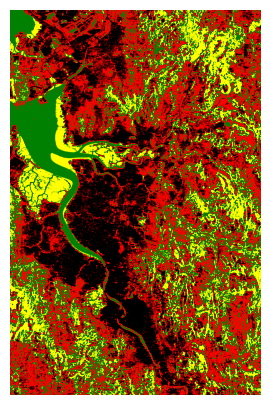

In [23]:
# Show the resulting array and save it as jpg image
plt.figure(figsize=[5,5])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig("F:\\Project\\unsupervised_dr.tif", bbox_inches='tight')  # Give file path where you want to save 
# By defalut it will save in C:\(Users\your pc name)
plt.show()

In [24]:
# if you unable to find your path then run the below command 

In [25]:
pwd() #to know the location of the files